# Fall 2023 SEEDS Discussion Forum- <span style= "color:red"> Dr. Ebenezer Larnyo¶</span>
# <span style= "color:red">Project:</span> Sentiment Analysis (Using data from Reddit of People with ASD)
# <span style= "color:red">Task:</span> Data Analysis and Visualizations

## Step 1: Import the necessary libraries.

In [1]:
# import needed libraries
import numpy as np
import pandas as pd
import csv
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import pearsonr

## Step 2: Read the cleaned data and print the first 4 rows

In [2]:
df = pd.read_csv('/Users/elarnyo/SEEDS_reddit_cleaned.csv')

# return first 4 rows
get_rows = df.head(4)

print(get_rows)

                                               title  \
0                 best apps for studying with autism   
1               How can we accommodate our employee?   
2  We need to talk about CARD (Center for Autism ...   
3                     Is my 30 y.o brother autistic?   

                                            selftext  \
0  hello, im autistic and in my first year of uni...   
1  My company hired someone recently, and things ...   
2  Everyone talks about autism speaks, but we nee...   
3  So I don't have any stereotypes about autistic...   

                                                 url             author  \
0  https://www.reddit.com/r/autism/comments/17h9j...            arespos   
1  https://www.reddit.com/r/autism/comments/17hm5...            AechBee   
2  https://www.reddit.com/r/autism/comments/17k3j...          livurlyfe   
3  https://www.reddit.com/r/autism/comments/17i75...  Obvious-Soft-1369   

      timestamp  num_comments  upvotes                        

## Step 3: Word Cloud Visualizations

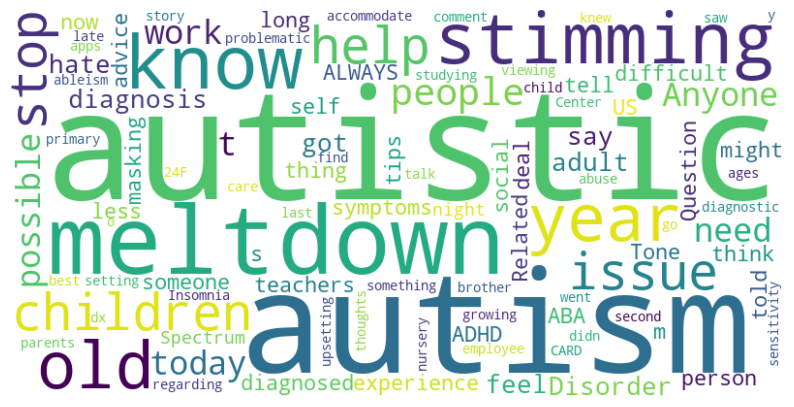

In [3]:
# Join the elements of the list `df['title']` together into a single string,
# using a single space character as the delimiter. The resulting string will be stored in the variable `text`.

text = ' '.join(df['title'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# save the above wordcloud as an image
wordcloud.to_file('/Users/elarnyo/wordcloud_title.png')

plt.show()

The above word cloud represents the frequency of words in the column 'text' by displaying them in a visual arrangement. It is seen that the most popular words seen in the titles are 'autism', 'autistic','meltdown', 'stimming', 'need' and 'issue'.

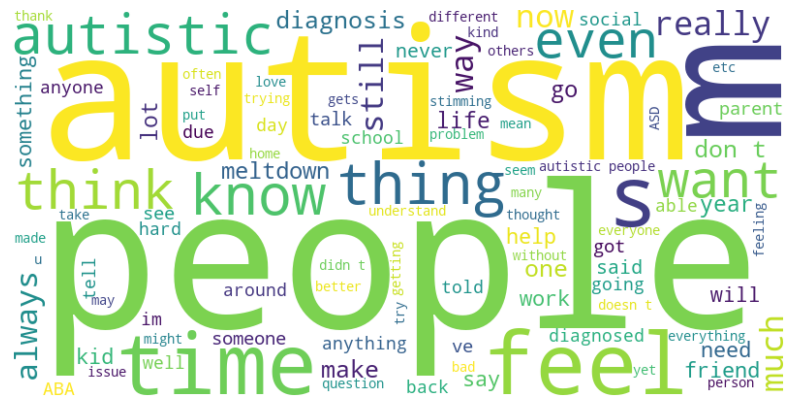

In [4]:
text = ' '.join(df['selftext'])

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# save the above wordcloud as an image
wordcloud.to_file('/Users/elarnyo/wordcloud_selftext.png')

plt.show()

The most frequent words are 'people','autism', feel', 'time', 'thing' and 'think'. 

## Step 4: Barchart/Piechart Visualizations

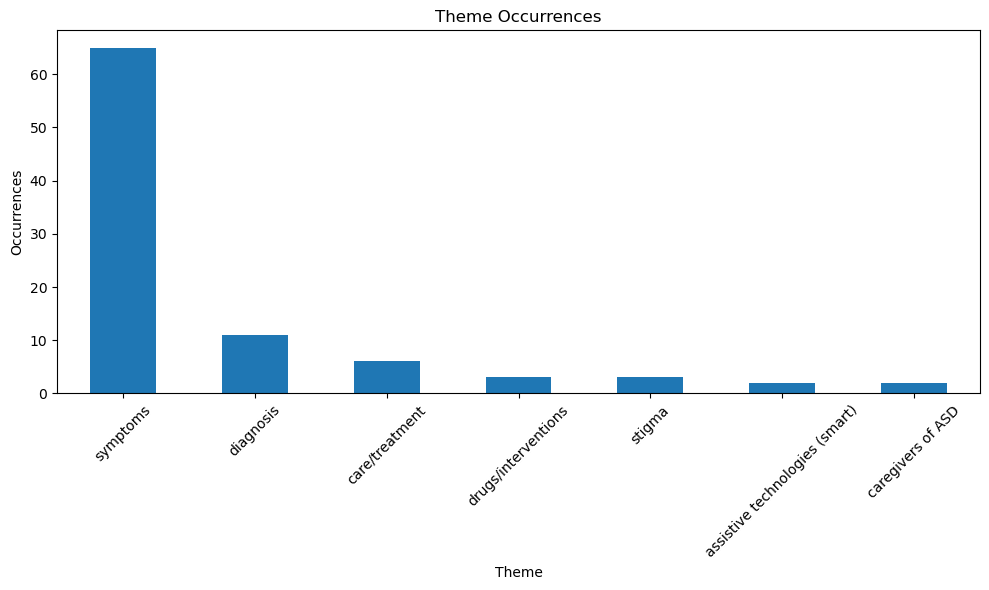

In [5]:
# Count the occurrences of each theme
theme_counts = df['theme'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar')
plt.xlabel('Theme')
plt.ylabel('Occurrences')
plt.title('Theme Occurrences')
plt.xticks(rotation=45) 
plt.tight_layout()  

# Save the bar chart as an image to my root folder
plt.savefig('/Users/elarnyo/barchart_theme_counts.png') 

# Show the plot
plt.show()

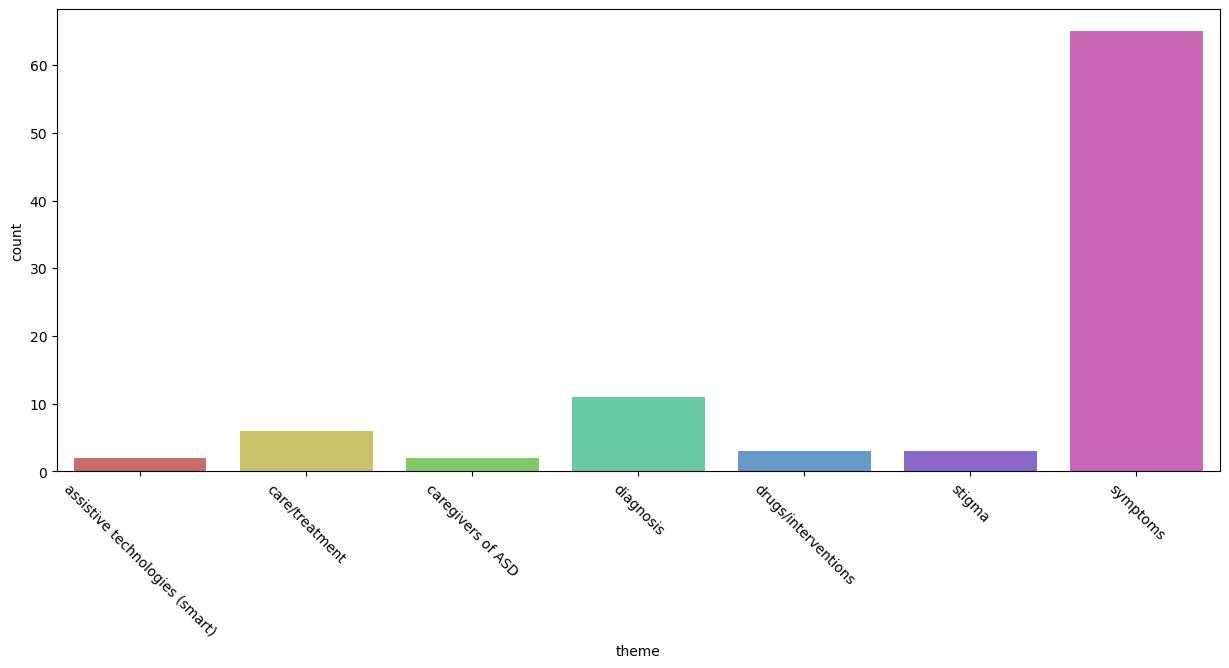

In [6]:
plt.figure(figsize=(15,6))
#palette = 'hls' is an option that specifies the color palette to be used for generating the colors of the plot elements
#sns.countplot(df['theme'], data = df, palette = 'hls')
sns.countplot(x='theme', data=df, palette='hls')
plt.xticks(rotation = -45)
plt.show()

The theme with the most number of posts is 'symptoms' followed by 'diagnosis' and 'care/treatment', respectively. The theme with the least number of posts is 'Caregivers of ASD'. 

In [7]:
#Plotly is a powerful data visualization library that allows you to create interactive and publication-quality graphs
fig = go.Figure(data=[go.Bar(x=df['theme'].value_counts().index, 
                                 y=df['theme'].value_counts())])
fig.update_layout(title='Theme', xaxis_title='Theme', yaxis_title="Count")
fig.show()

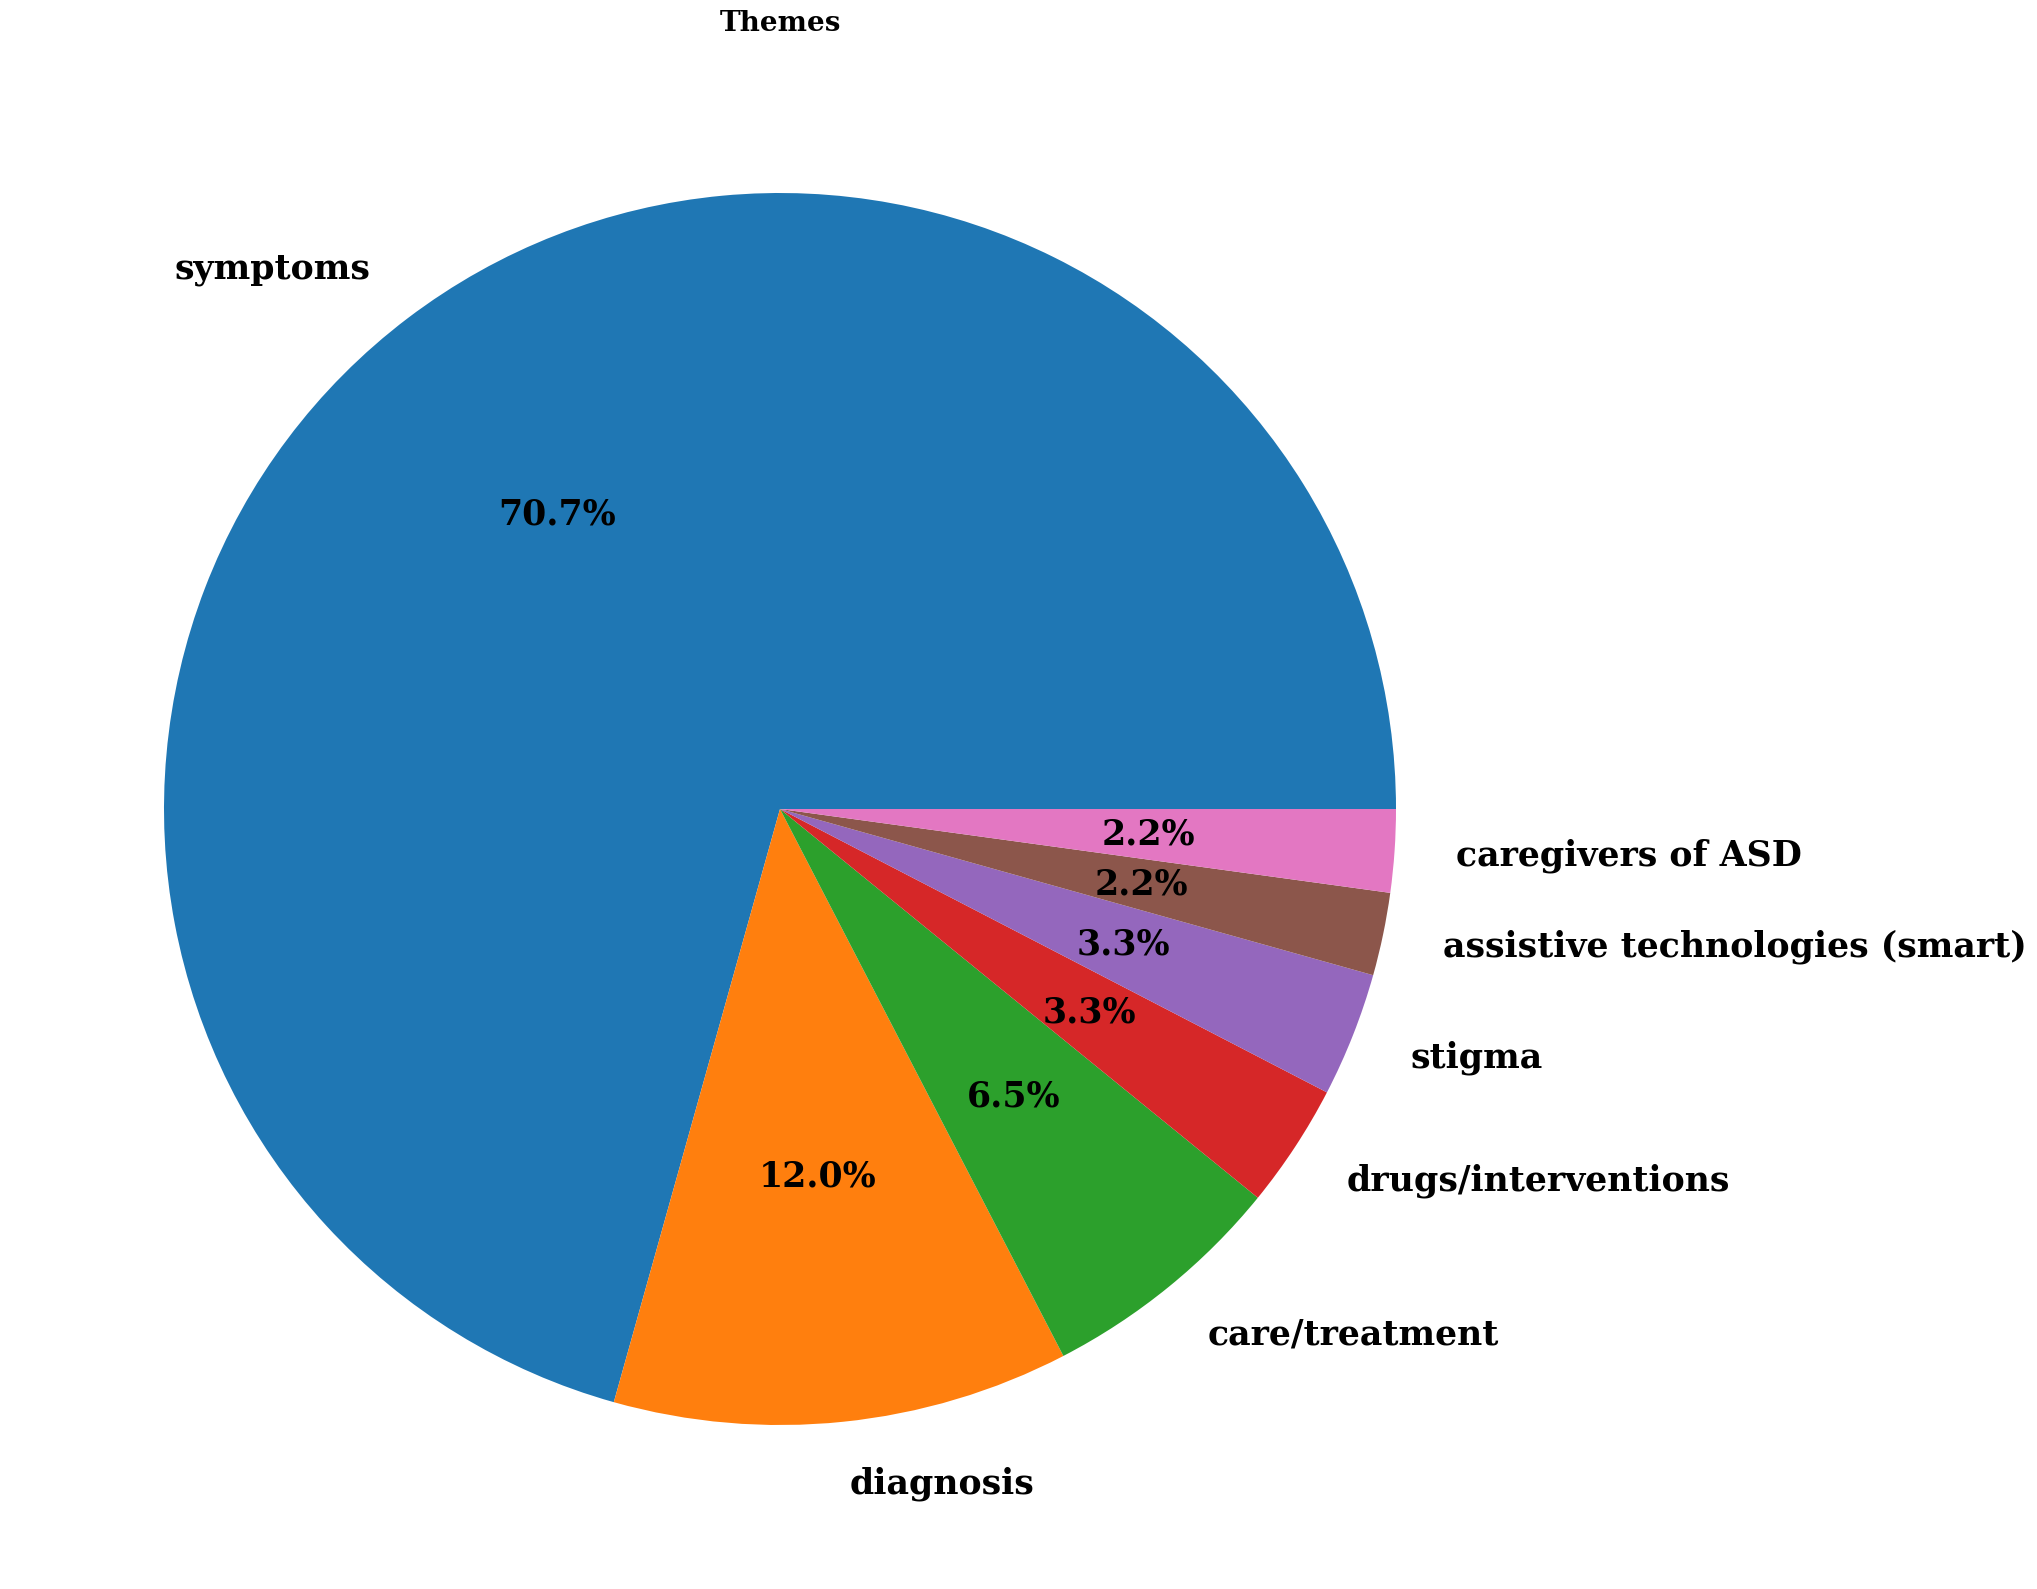

In [8]:
plt.figure(figsize=(30,20)) 
plt.pie(df['theme'].value_counts(), labels=df['theme'].value_counts().index, 
        autopct='%1.1f%%', textprops={ 'fontsize': 25,
                                       'color': 'black',
                                        'weight': 'bold',
                                        'family': 'serif' }) 
hfont = {'fontname':'serif', 'weight': 'bold'}
plt.title('Themes', size=20, **hfont) 
plt.show()

In [9]:
fig = px.pie(df, names='theme', title = 'Theme')
fig.show()

#### Let's try some tricks with the difference in number of comments and number of upvotes across the different themes

<Figure size 1000x600 with 0 Axes>

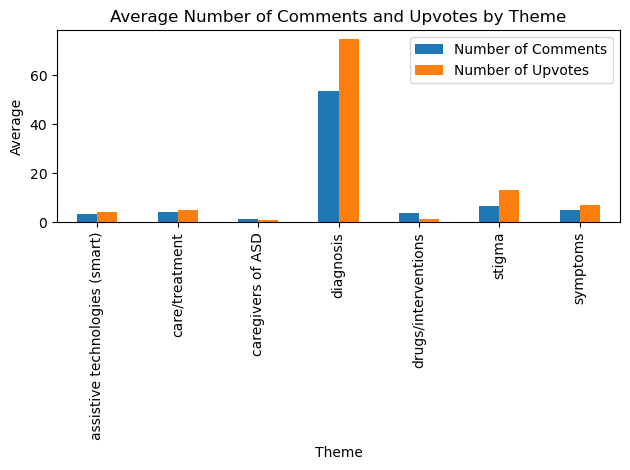

In [10]:
# Calculate the average num_comments and upvotes for each theme
theme_avg_data = df.groupby('theme')[['num_comments', 'upvotes']].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
theme_avg_data.plot(kind='bar')
plt.xlabel('Theme')
plt.ylabel('Average')
plt.title('Average Number of Comments and Upvotes by Theme')
plt.xticks(rotation=90)  
plt.legend(['Number of Comments', 'Number of Upvotes'])
plt.tight_layout()

# Save the bar chart as an image to my root folder
plt.savefig('/Users/elarnyo/barchart_theme_comments_upvotes_avgs.png')

# Show the plot
plt.show()

The theme with the most number of upvotes and comments is 'diagnosis'. The theme with the least number of user interaaction was 'caregivers of ASD'. 

## Histogram Visualizations
For distribution of the numerical columns: number of comments, number of upvotes, and timestamp.

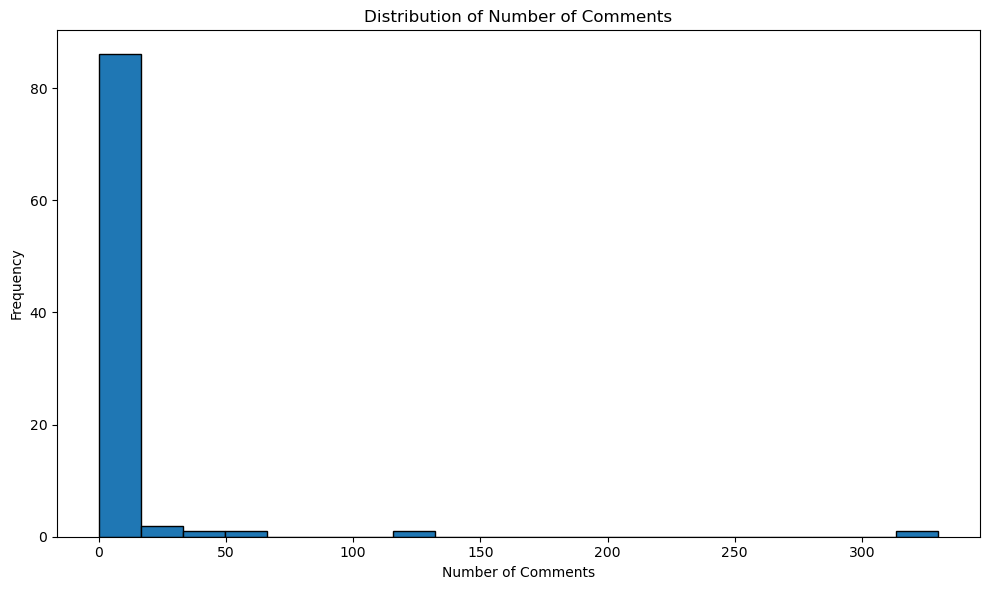

In [11]:
# distribution: number of comments

# Extract the "num_comments" column
num_comments = df['num_comments']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_comments, bins=20, edgecolor='black')  
plt.xlabel('Number of Comments')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Comments')
plt.tight_layout()

# Save as an image to the my root folder
plt.savefig('/Users/elarnyo/histogram_num_comments.png')
# Show the histogram
plt.show()

Most of the posts have less than 20 comments. However, there is an outlier, however, with more than 360 comments.

<Figure size 1500x600 with 0 Axes>

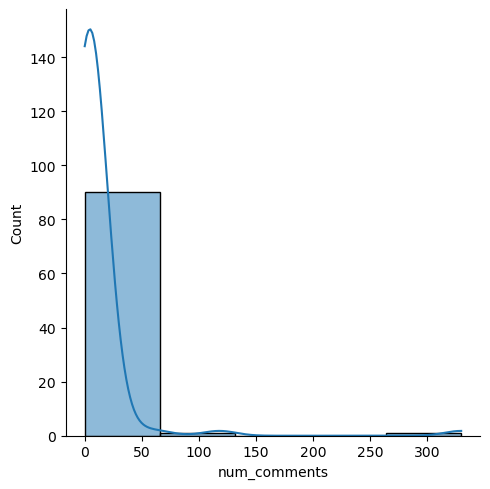

In [12]:
plt.figure(figsize=(15, 6))
sns.displot(df['num_comments'].dropna(), kde=True, bins=5)
plt.show()

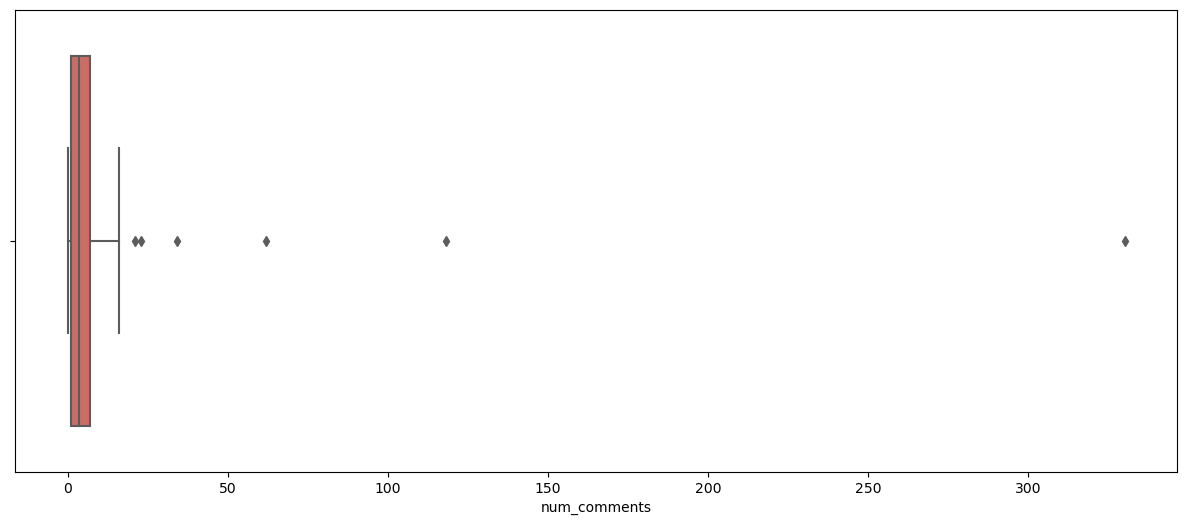

In [13]:
plt.figure(figsize=(15,6))
sns.boxplot(x='num_comments', data = df, palette = 'hls')
plt.show()

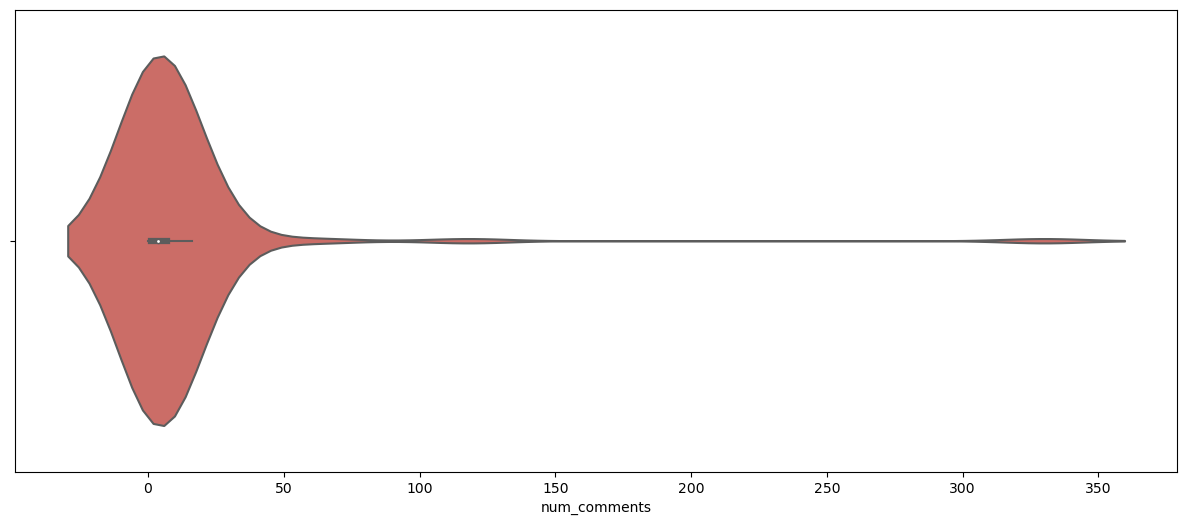

In [14]:
plt.figure(figsize=(15,6))
sns.violinplot(x='num_comments', data = df, palette = 'hls')
plt.show()

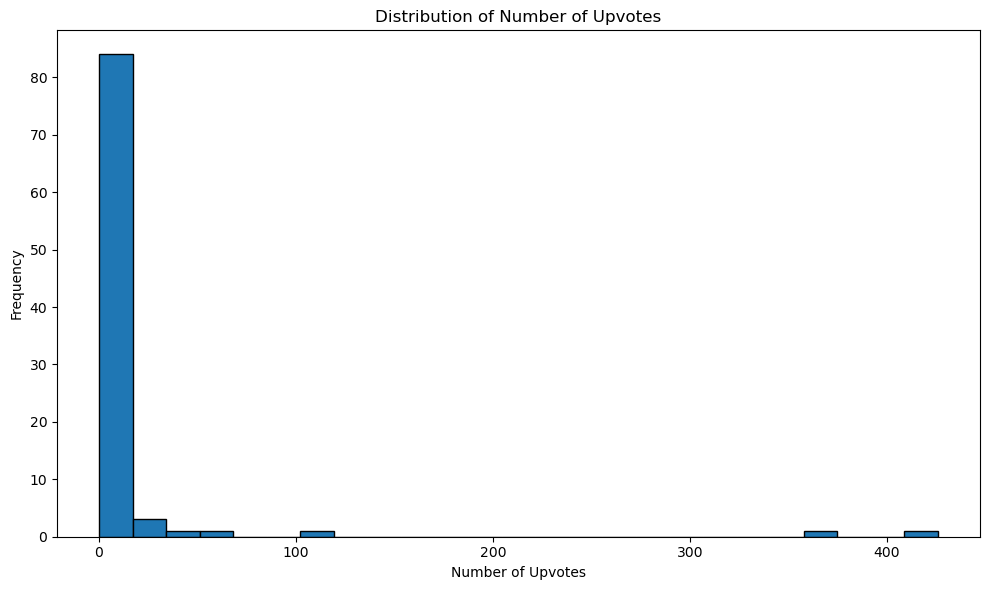

In [15]:
# distribution: number of upvotes

# Extract the "upvotes" column
num_upvotes = df['upvotes']

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_upvotes, bins=25, edgecolor='black')  
plt.xlabel('Number of Upvotes')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Upvotes')
plt.tight_layout()

# Save as an image to my folder
plt.savefig('/Users/elarnyo/histogram_num_upvotes.png')
# Show the histogram
plt.show()

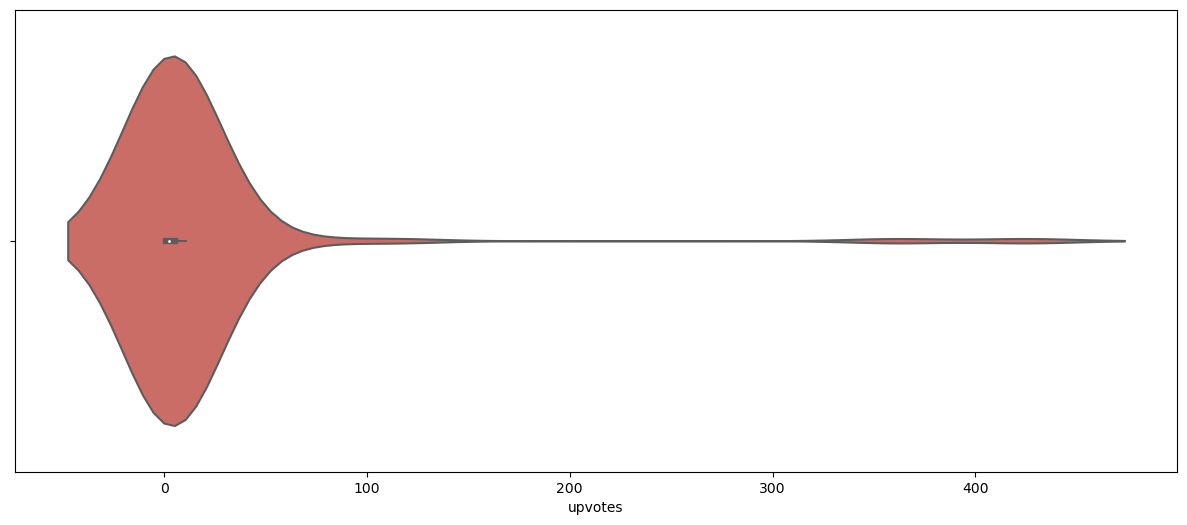

In [16]:
plt.figure(figsize=(15,6))
sns.violinplot(x='upvotes', data = df, palette = 'hls')
plt.show()

Most of the posts received less than 80 upvotes. The maximum number of upvotes is over 420. 

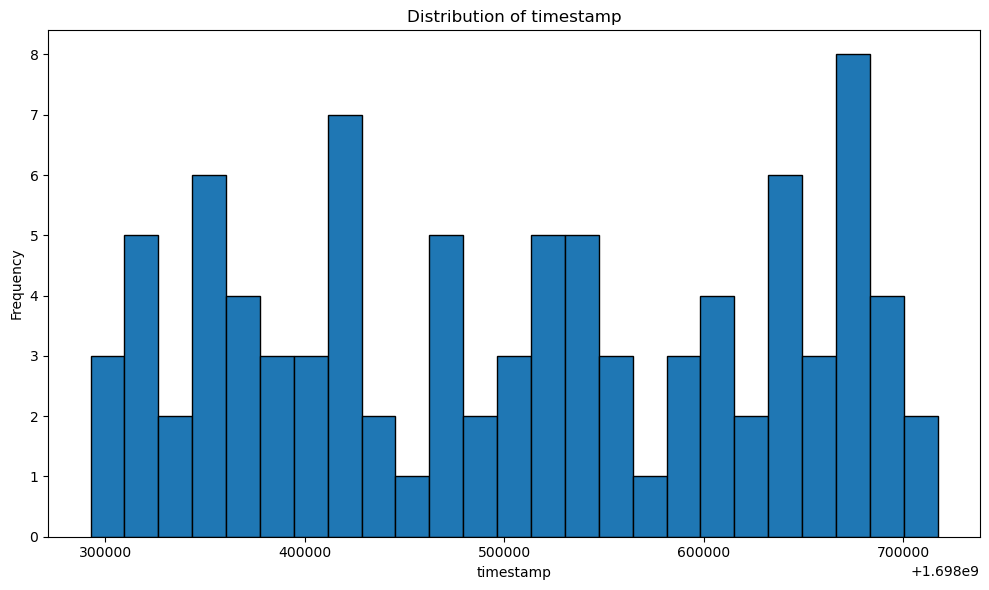

In [17]:
# distribution: timestamp

# Extract the "timestamp" column
num_timestamp = df['timestamp']

# Convert 'timestamp' to datetime
#df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # assuming the timestamp is in seconds

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_timestamp, bins=25, edgecolor='black')  
plt.xlabel('timestamp')
plt.ylabel('Frequency')
plt.title('Distribution of timestamp')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('/Users/elarnyo/histogram_timestamp.png')

# Show the histogram
plt.show()


The distribution of the time of posts is within a set range. There are no outliers. There are about 7 peaks in the time range in which there were many posts. 

## Correlation between variables
Let's look at the correlation between variables using scatter plots and heat maps. 

### Scatter Plots

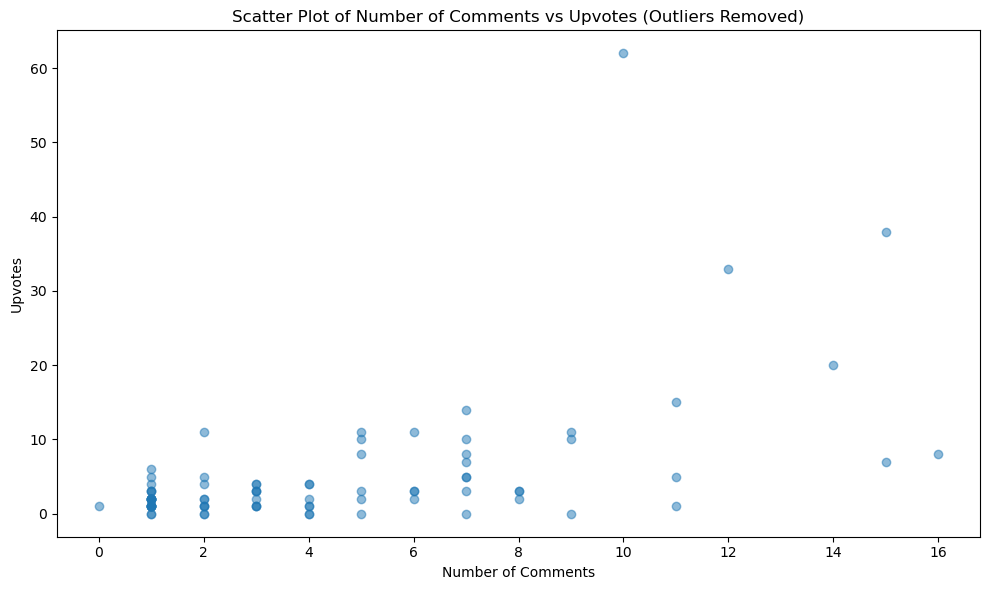

In [18]:
# Relationship between number of comments and number of upvotes

# Extract the "num_comments" and "upvotes" columns
num_comments = df['num_comments']
upvotes = df['upvotes']

# Calculate the IQR
Q1 = num_comments.quantile(0.25)
Q3 = num_comments.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(num_comments >= lower_bound) & (num_comments <= upper_bound)]

# Extract the filtered "num_comments" and "upvotes" columns
filtered_num_comments = filtered_df['num_comments']
filtered_upvotes = filtered_df['upvotes']

# Create a scatter plot without outliers
plt.figure(figsize=(10, 6))
plt.scatter(filtered_num_comments, filtered_upvotes, alpha=0.5)
plt.xlabel('Number of Comments')
plt.ylabel('Upvotes')
plt.title('Scatter Plot of Number of Comments vs Upvotes (Outliers Removed)')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('/Users/elarnyo/scatter_upvotes_comments.png')

# Show the scatter plot
plt.show()

In [19]:
# Calculate the correlation coefficient
correlation_coefficient = num_comments.corr(upvotes)

print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.89836376239877


In [20]:
# num_comments and upvotes are our two variables
correlation_coefficient, p_value = pearsonr(num_comments, upvotes)

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Check significance level
alpha = 0.05  # set your desired significance level

if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation Coefficient: 0.8983637623987675
P-value: 6.505780636489967e-34
The correlation is statistically significant.


There's a strong significant positive linear correlation between comments and upvotes (Coeff: ~ 0.898, p-value: 0.000) suggesting that, as the number of comments increases so does the number of upvotes. 

### Heat Maps
The correlation between all of the variables in the data set using a heat map.

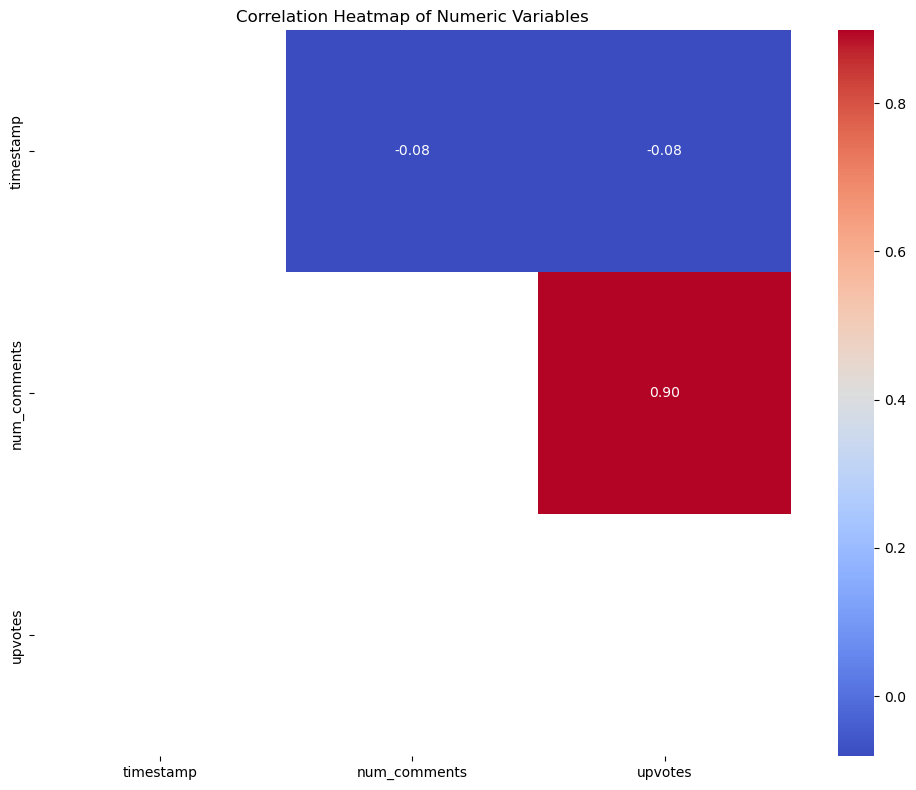

In [21]:
# Select only the numeric variables
numeric_vars = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_vars.corr()

# only show upper diagonal correlations
mask = np.tri(*corr_matrix.shape, k=0)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask = mask)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()

# Save as an image to the desktop
plt.savefig('/Users/elarnyo/heatmap_numeric_variables.png')

# Show the heatmap
plt.show()

The only two variables that correlated are num_comments and upvotes.

# Download File and Send
Download the images from the visualization and email it together with you Jupyter notebook to <b><u>elarnyo@ucsb.edu.</b></u>

#### <span style="color:red">Add the CSV and Jupyter notebook to the Git repo you created and also to your Google drive in the SEEDS folder </span>

## Great job with the initial data analysis and visualizations in python!
## Next time, we'll perform a more advance analysis. Please feel free to practice the what we've learnt so far!!! Also read on <span style="color:red"><b><u>sentiment analysis</b></u></span>